C:\Users\ACER\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\ACER\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\ACER\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\ACER\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


ความเร็วการหมุนของมอเตอร์ที่เหมาะสมต่อการซักผ้า : 9.666666666666666


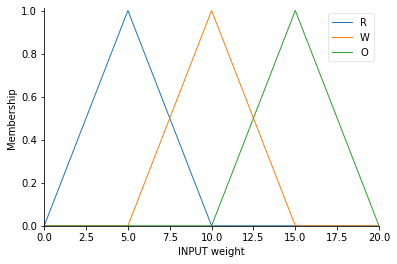

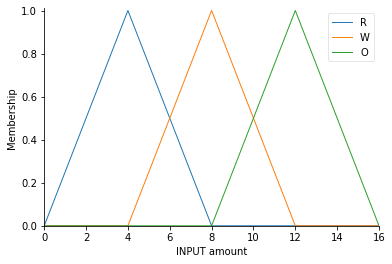

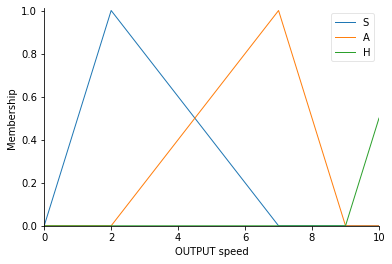

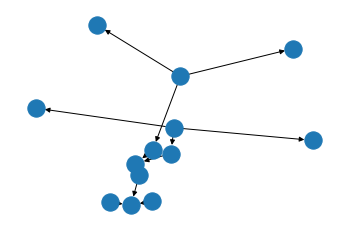

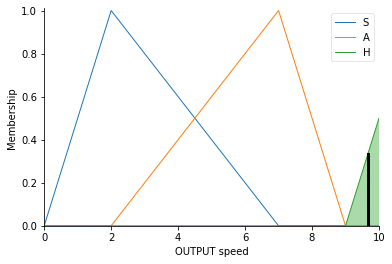

In [9]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


weight = ctrl.Antecedent(np.arange(0, 21, 1), 'INPUT weight')
amount = ctrl.Antecedent(np.arange(0, 17, 1), 'INPUT amount')
speed = ctrl.Consequent(np.arange(0, 11, 1), 'OUTPUT speed')


weight['R'] = fuzz.trimf(weight.universe, [0, 5, 10])
weight['W'] = fuzz.trimf(weight.universe, [5, 10, 15])
weight['O'] = fuzz.trimf(weight.universe, [10, 15, 20])

amount['R'] = fuzz.trimf(amount.universe, [0, 4, 8])
amount['W'] = fuzz.trimf(amount.universe, [4, 8, 12])
amount['O'] = fuzz.trimf(amount.universe, [8, 12, 16])

speed['S'] = fuzz.trimf(speed.universe, [0, 2, 7])
speed['A'] = fuzz.trimf(speed.universe, [2, 7, 9])
speed['H'] = fuzz.trimf(speed.universe, [9, 11, 13])

weight.view()
amount.view()
speed.view()


rule1 = ctrl.Rule(weight['R'] & amount['R'], speed['S'])
rule2 = ctrl.Rule(weight['R'] & amount['W'], speed['A'])
rule3 = ctrl.Rule(weight['R'] & amount['O'], speed['A'])

rule4 = ctrl.Rule(weight['W'] & amount['R'], speed['A'])
rule5 = ctrl.Rule(weight['W'] & amount['W'], speed['H'])
rule6 = ctrl.Rule(weight['W'] & amount['O'], speed['H'])

rule7 = ctrl.Rule(weight['O'] & amount['R'], speed['A'])
rule8 = ctrl.Rule(weight['O'] & amount['W'], speed['H'])
rule9 = ctrl.Rule(weight['O'] & amount['O'], speed['H'])

rule1.view()
speedping_ctrl = ctrl.ControlSystem(
    [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
speedping = ctrl.ControlSystemSimulation(speedping_ctrl)

speedping.input['INPUT weight'] = 15
speedping.input['INPUT amount'] = 10


speedping.compute()
speed.view(sim=speedping)
print("ความเร็วการหมุนของมอเตอร์ที่เหมาะสมต่อการซักผ้า :",speedping.output['OUTPUT speed'])